In [1]:
from IPython.display import display, HTML

# Set the width to a specific percentage of the screen width, e.g., 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from os import path

PROJECT_ROOT = path.abspath(path.join(globals()['_dh'][0], '..'))
DATALAKE_PATH = path.abspath(path.join(PROJECT_ROOT, '..', '..', 'datalake', 'txtproj'))
MODEL_DIR = path.abspath(path.join(PROJECT_ROOT, 'txtproj', 'classifier'))

FQFN_PROCESSED_DF = path.join(DATALAKE_PATH, 'processed', 'processed_20250203.jsonl')
FQFN_VOCABULARY = path.join(DATALAKE_PATH, 'processed', 'vocabulary_20250203.json')

In [3]:
from trainer import text_folder_loader

wtl = text_folder_loader.TextFolderLoader()
wtl.read(DATALAKE_PATH, labels=['0', '1'])

In [9]:
df = wtl.df
df[60:65][['text', 'text_tfidf', 'label']]

,text,text_tfidf,label
60,chaikin analytics opens new window opens exter...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.114...",0
61,stansberry research opens new window opens ext...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
62,<empty>,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
63,forbidden <num> forbidden,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
64,sauravtest <num>,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


<Axes: >

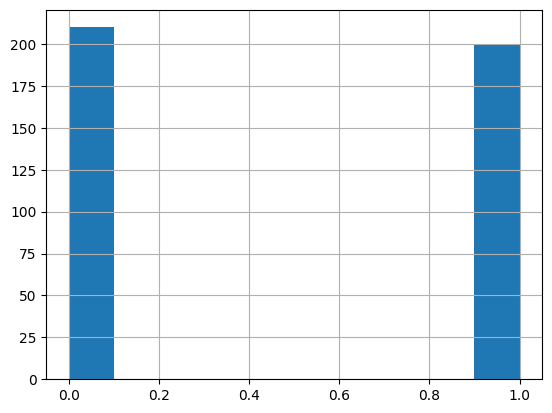

In [10]:
df['label'].hist()

In [20]:
# for label in df['label'].unique():
#     sampled_df = df[df['label'] == label]['text'].sample(n=10)
#     print(f'Sampled Series for text with label {label}:')
#     display(sampled_df)

In [17]:
df.to_json(FQFN_PROCESSED_DF, orient='records', lines=True)

In [18]:
import json

for fqfp in [FQFN_VOCABULARY, './classifier/vocabulary.json']:
    print(f'Positive case vocabulary size={len(wtl.vocabulary)}')
    with open(fqfp, encoding='utf-8', mode='w+') as f:
        json.dump(wtl.vocabulary, fp=f)

Positive case vocabulary size=256
Positive case vocabulary size=256
